In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
# DATA_ROOT = "~/nba-3d-data/harden"
DATA_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden'

In [10]:
def to_uint8(img):
    return (img/img.max()*255.).astype(np.uint8)

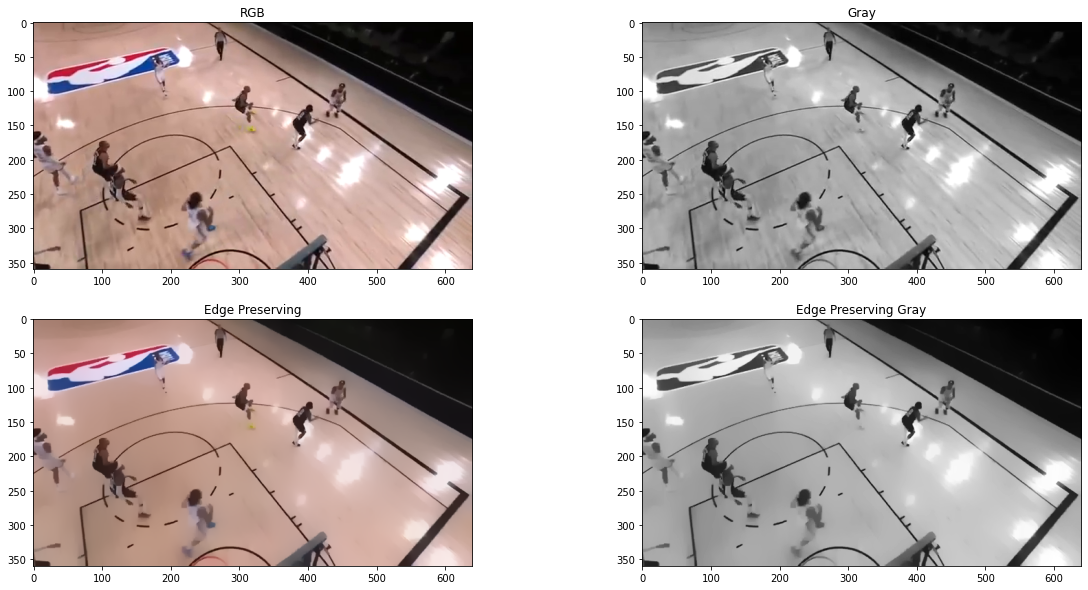

In [11]:
img = plt.imread(DATA_ROOT+'/all_frames/frame_00039.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
grayu = cv2.normalize(gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

img_ep = cv2.edgePreservingFilter(to_uint8(img))
gray_ep = cv2.cvtColor(img_ep, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(221);plt.imshow(img);plt.title('RGB')
plt.subplot(222);plt.imshow(gray, cmap='gray');plt.title('Gray')
plt.subplot(223);plt.imshow(img_ep);plt.title('Edge Preserving')
plt.subplot(224);plt.imshow(gray_ep, cmap='gray');plt.title('Edge Preserving Gray')
plt.show()

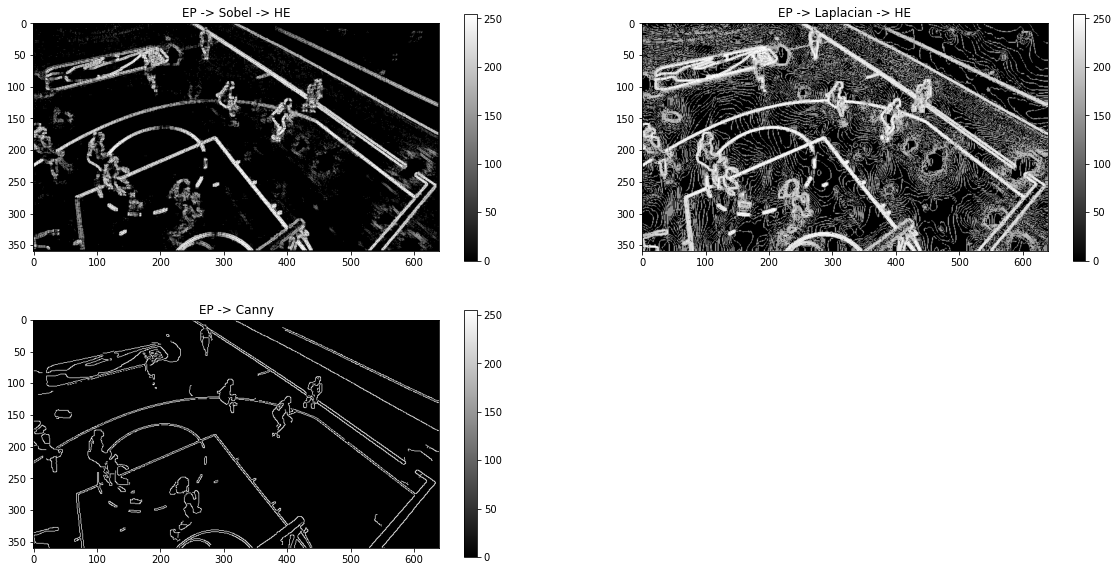

In [12]:
sobel = cv2.Sobel(gray_ep, cv2.CV_32F, 1, 1, ksize=3)
sobel = cv2.equalizeHist(to_uint8(np.abs(sobel)))
laplacian = cv2.Laplacian(gray_ep, cv2.CV_32F, ksize=3)
laplacian = cv2.equalizeHist(to_uint8(np.abs(laplacian)))
canny = cv2.Canny(gray_ep, 50,150, apertureSize = 3)
cannybf = cv2.Canny(cv2.bilateralFilter(grayu, 7, 50, 50), 50,150, apertureSize = 3)

plt.figure(figsize=(20, 10))
plt.subplot(221);plt.imshow(sobel, cmap='gray');plt.colorbar();plt.title('EP -> Sobel -> HE')
plt.subplot(222);plt.imshow(laplacian, cmap='gray');plt.colorbar();plt.title('EP -> Laplacian -> HE')
plt.subplot(223);plt.imshow(canny, cmap='gray');plt.colorbar();plt.title('EP -> Canny')
plt.show()


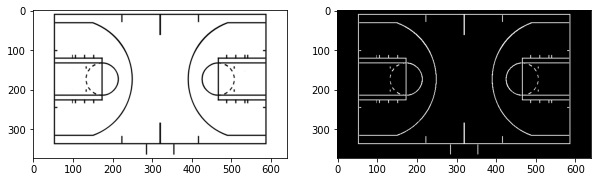

In [84]:
img = plt.imread('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/court.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
binary = gray<0.1
plt.figure(figsize=(10,3))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(binary, cmap='gray')
plt.show()

In [16]:
img1 = binary.astype(np.uint8)*255
img2 = sobel.copy()

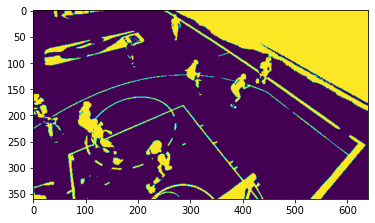

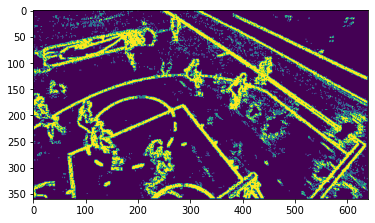

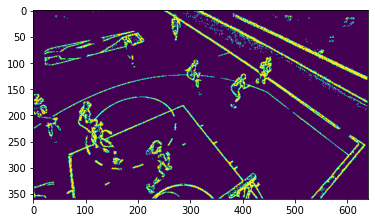

In [62]:
plt.imshow(gray<0.5);plt.show()
plt.imshow(sobel>50);plt.show()
plt.imshow(np.logical_and(gray<0.5, sobel>50));plt.show()

In [63]:
img1 = binary.astype(np.uint8)*255
img2 = np.logical_and(gray<0.5, sobel>50).astype(np.uint8)*255

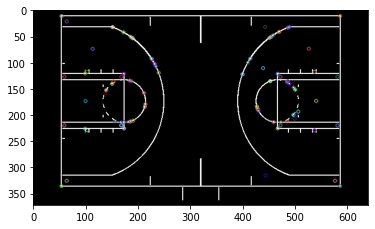

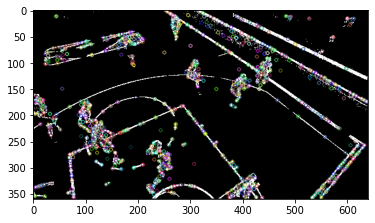

In [69]:
temp = img1.copy()
temp = cv2.drawKeypoints(temp, kp1, temp)
plt.imshow(temp);plt.show()


temp = img2.copy()
temp = cv2.drawKeypoints(temp, kp2, temp)
plt.imshow(temp);plt.show()

In [68]:
sift = cv2.SIFT_create() # sift = cv2.SIFT()
kp1,des1 = sift.detectAndCompute(img1, None)
kp2,des2 = sift.detectAndCompute(img2, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good=[]
for m, n in matches:
    if m.distance<0.7*n.distance:
        good.append(m)
        
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)


M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

matchesMask = mask.ravel().tolist()

h, w, = gray.shape
pts = np.float32([[0,0], [0, h-1], [w-1, h-2],[w-1,0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, M)

temp = img1.copy()

temp = cv2.warpPerspective(temp, M, (500, 500))

plt.imshow(temp)

error: OpenCV(4.4.0) /tmp/pip-req-build-zeowd5_m/opencv/modules/core/src/matmul.dispatch.cpp:531: error: (-215:Assertion failed) scn + 1 == m.cols in function 'perspectiveTransform'


In [87]:
img = binary.astype(np.uint8)*255

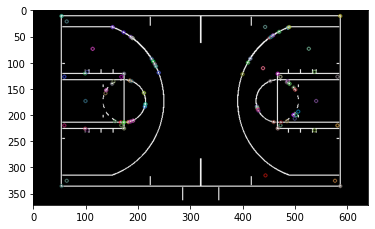

In [88]:
plt.imshow(img)
sift = cv2.SIFT_create() # sift = cv2.SIFT()
kp1,des1 = sift.detectAndCompute(img, None)
temp = img.copy()
temp = cv2.drawKeypoints(temp, kp1, temp)
plt.imshow(temp);plt.show()


In [106]:
img1 = cv2.resize(img, dsize=(img.shape[1]*10, img.shape[0]*10))

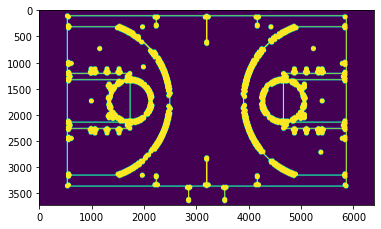

In [108]:
plt.imshow(img1)
sift = cv2.SIFT_create() # sift = cv2.SIFT()
kp1,des1 = sift.detectAndCompute(img1, None)
temp = img1.copy()
for p in kp1:
    cv2.circle(temp, tuple([int(x) for x in p.pt]), 50, 255, -1)
# temp = cv2.drawKeypoints(temp, kp1, temp)
plt.imshow(temp);plt.show()


# BIG REALIZATION


why do I need SIFT to find me keypoints?
I have the keypoints from the images I want anyways.... 
Just samples points where the image is white...
This will give you a good idea about the shape of the image.
perfect for ransac to find a homography

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

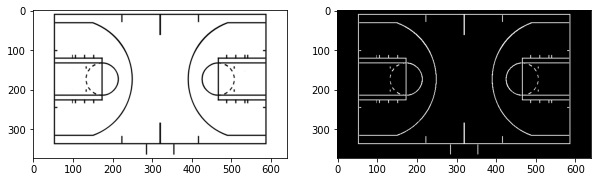

In [4]:
court = plt.imread('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/court.png')
court_gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
court_bin = gray<0.1
plt.figure(figsize=(10,3))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(binary, cmap='gray')
plt.show()

In [42]:
real_bin = sobel>100

In [43]:
pts_real_y, pts_real_x = np.where(real_bin)
pts_court_y, pts_court_x = np.where(court_bin)

In [51]:
pts_real = np.stack([pts_real_x, pts_real_y], axis=-1)[:, None, :]
pts_court = np.stack([pts_court_x, pts_court_y], axis=-1)[:, None, :]

In [58]:
sift = cv2.SIFT_create() # sift = cv2.SIFT()
kp1,des1 = sift.detectAndCompute(img1, None)
kp2,des2 = sift.detectAndCompute(img2, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good=[]
for m, n in matches:
    if m.distance<0.7*n.distance:
        good.append(m)
        
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)


M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

matchesMask = mask.ravel().tolist()

h, w, = gray.shape
pts = np.float32([[0,0], [0, h-1], [w-1, h-2],[w-1,0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, M)

temp = img1.copy()

temp = cv2.warpPerspective(temp, M, (500, 500))

plt.imshow(temp)

error: OpenCV(4.4.0) /tmp/pip-req-build-zeowd5_m/opencv/modules/calib3d/src/fundam.cpp:380: error: (-215:Assertion failed) src.checkVector(2) == dst.checkVector(2) in function 'findHomography'
